<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>
<h2 align='center'> Diego Gutierrez 201573558-1 </h2>
<h2 align='center'> Maria Apolo 201573509-3 </h2>
<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting* y *random forest*.
* Ventajas de técnicas de ensamblados
* Problemas desbalanceados
 

**Formalidades**  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y cierre competencia: 17 de Enero
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea3-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Ensamblados para regresión  
[2.](#segundo) Detección de acoso en *Twitter*  

<a id="primero"></a>
## 1. Ensamblados para regresión
---
Las técnicas de ensamblados vistos en clases pueden ser aplicadas tanto a problemas de clasificación o regresión, teniendo la ventaja de utilizar múltiples modelos de aprendizaje para utilizar la ventaja de cada uno. En este actividad se trabajará con predecir la temperatura media de un día, dada cierta información del día anterior, como la humedad, velocidad del viento, presión atmosférica, fecha y temperatura. El modelo predictor derivado puede ser bastante útil para conocer el comportamiento del clima a lo largo del tiempo.

<img src="https://scijinks.gov/review/forecast-reliability/forecast-reliability2.jpg" title="Title text" width="70%"  />

Los datos de clima son recolectados en la ciudad Delhi de India por un período de 4 años (2013 a 2017), proporcionados en Kaggle a través del siguiente __[link](https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data)__, las particiones de entrenamiento y prueba están dadas. El registro de cada dato corresponde a un día, incrementando a través de las filas por cada día.

---
    

>  Cargue los datos en un dataframe de pandas, además agregue una columna indicando el valor a predecir, la temperatura media del día siguiente. *Como el último dato/registro no tiene un valor a predecir éste se elimina*.
```python

In [24]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTrain.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row

> Debido a la poca información que se tiene a través de los 4 parámetros medidos, extraíga más información a través de los datos de fecha. Por ejemplo, el comportamiento a través de los meses y años varía, así como la información de la temporada del año podría ayudar a la predicción. Decida si puede incluir más información a partir de la fecha que tenga sentido con el problema.

In [25]:
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date


> Cree las matrices de entrenamiento, con los mil primeros registros, y de validación, con el resto. Para evitar el orden natural en que vienen los datos entrenados, realice un *shuffle* aleatorio.

In [26]:
y = df.pop("y_value").values
X = df.values 
X_train = X[:1000]
y_train = y[:1000]
X_val = X[1000:]
y_val = y[1000:]
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0) #shuffle values on train only

> a) Describa el problema trabajado, la cantida de datos que se cuenta como las características a trabajar. Al ser datos temporales podría ayudar una ilustración gráfica de la secuencias trabajadas y su comportamiento ¿Es válido el uso de la información sólo del día anterior?.


En este problema se trabaja un problema de regresión para poder predecir la temperatura del dia siguiente. Para esto tenemos diferentes columnas de un archivo de prueba y de test. Estas columnas descibren la temperatura, humedad, la velocidad del viento y la presión del dia. Estos dias estan separados por día, mes y año.

In [27]:
df.head()

,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_fall,season_rainy,season_summer,season_winter
0,10.000000,84.500000,0.000000,1015.666667,1,2013,1,0,0,0,1
1,7.400000,92.000000,2.980000,1017.800000,2,2013,1,0,0,0,1
2,7.166667,87.000000,4.633333,1018.666667,3,2013,1,0,0,0,1
3,8.666667,71.333333,1.233333,1017.166667,4,2013,1,0,0,0,1
4,6.000000,86.833333,3.700000,1016.500000,5,2013,1,0,0,0,1


In [28]:
print("La cantidad de datos a trabajar en el conjunto de entrenamiento es",X_train.shape[0])
print("La cantidad de datos a trabajar en el conjunto de validacion es",X_val.shape[0])

La cantidad de datos a trabajar en el conjunto de entrenamiento es 1000
La cantidad de datos a trabajar en el conjunto de validacion es 461


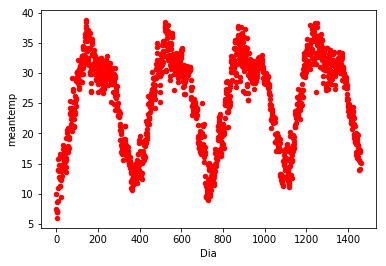

In [29]:
import numpy as np
df['Dia'] = np.arange(start=0, stop=1461, step=1)
df.plot(kind='scatter',x='Dia',y='meantemp',color='red')


En esta gráfica podemos ver que la tempertura del dia siguiente sigue una relación con los dias anteriores. Podemos ver que hay un aumento lineal en la temperatura hasta cierto dia, luego disminuye y finalmente se repite el ciclo nuevamente a partir del año siguiente (365 dias despues). Creemos que no solo el dia anterior es necesario para poder predecir el siguiente, ya que llegado a un punto no sabemos si la tempertura disminuira o seguira subiendo.

> b) Entrene un solo Árbol de Regresión de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja). Además comente sobre la ventaja de usar un árbol de decisión respecto a la escala de los datos ¿Porqué no es necesario escalar los datos?


In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor as Tree
from ipywidgets import interactive

model_unr = Tree() #unregularized model -- default parameters
model_unr.fit(X_train,y_train)

def regularizedtree(param,param2,param3):
    model_r=Tree()
    model_r.set_params(max_depth=param,min_samples_split=param2,min_samples_leaf=param3)
    model_r.fit(X_train,y_train)
    return model_r
#Se varia la profundidad del arbol
model_r=regularizedtree(10,2,1)

Se creo un modelo regularizado utilizando parametros de maxima profundidad igual a 10, min_samples_split igual a 2 y min_samples_leaf igual a 1. Estos valores se sacaron al probar con diferentes valores y observar cual parametro se ajustaba mejor. Los arboles de decisión no necesitan escalar dado que son invariantes ante cualquier transformación monotonica de una variable, caracteristica o input independiente. Por ejemplo, si se realiza una transformación logaritmica en los datos estos no van a variar en el arbol dado que trabaja con sistemas de partición.

> c) Para evaluar la calidad de predicción en este problema se utilizará la métrica *Root Mean Squared Error* (RMSE), indicando un error en la escala real de la temperatura. Como los datos de validación siguen con el orden temporal, visualice esa predicción a lo largo del tiempo. Comente sobre los resultados comparando la regularización *vs* el no regularizar.


In [8]:
def RMSE(ytrue,ypred):
    return np.sqrt(np.mean(np.square(ytrue - ypred)) )

y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
y_train2_hat = model_unr.predict(X_train)
y_val2_hat = model_unr.predict(X_val)
print("RMSE train Regularized Tree= ",RMSE(y_train,y_train_hat))
print("RMSE val Regularized Tree= ",RMSE(y_val,y_val_hat))
print("RMSE train UnRegularized Tree= ",RMSE(y_train,y_train2_hat))
print("RMSE val UnRegularized Tree= ",RMSE(y_val,y_val2_hat))

RMSE train Regularized Tree=  0.8225590812601147
RMSE val Regularized Tree=  2.467251577146611
RMSE train UnRegularized Tree=  0.0
RMSE val UnRegularized Tree=  2.5718809456774703


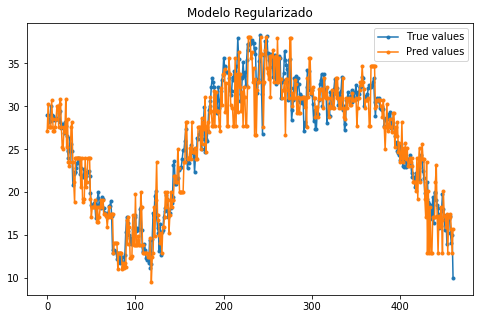

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val_hat, '.-' ,label="Pred values")
plt.legend()
plt.title("Modelo Regularizado")
plt.show()

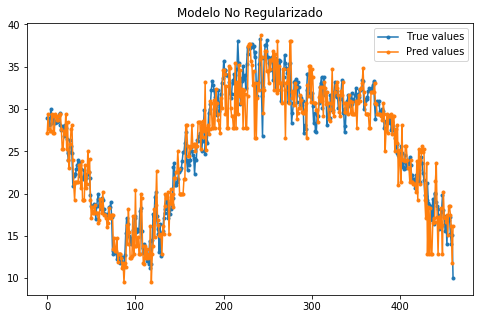

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(y_val, '.-' ,label="True values")
plt.plot(y_val2_hat, '.-' ,label="Pred values")
plt.legend()
plt.title("Modelo No Regularizado")
plt.show()

Podemos ver que los valores predecidos y los verdaderos siguen la misma tendencia para las dos gráficas. Esto es dado que el error calculado anterior es muy bajo. El arbol sin regularizar obtiene mejores resultados pero tiene mayor tendencia a overfitting que uno regularizado. Esto es esperado dado que al ajustar los parametros, la idea es generalizar el modelo.

> d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en b)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.
```python

```

In [11]:
from sklearn.ensemble import BaggingRegressor

##No Regularizado
model_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=100, n_jobs=-1)
model_unr.fit(X_train,y_train)
y_train2_hat = model_unr.predict(X_train)
y_val2_hat = model_unr.predict(X_val)
print("RMSE train No Regularizado Tree= ",RMSE(y_train,y_train2_hat))
print("RMSE val No Regularizado Tree= ",RMSE(y_val,y_val2_hat))
##Regularizado
model_r = BaggingRegressor(base_estimator=Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators=100, n_jobs=-1)
model_r.fit(X_train,y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train Regularized Tree= ",RMSE(y_train,y_train_hat))
print("RMSE val Regularized Tree= ",RMSE(y_val,y_val_hat))



RMSE train No Regularizado Tree=  0.648105514104389
RMSE val No Regularizado Tree=  1.6888468362504976
RMSE train Regularized Tree=  0.6830486969911398
RMSE val Regularized Tree=  1.6774052861136435


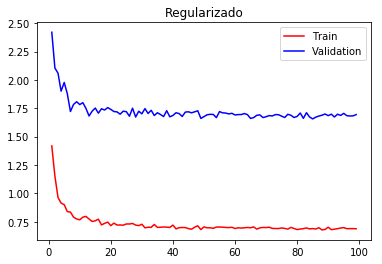

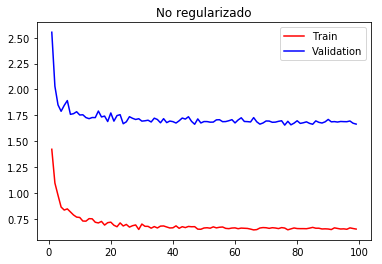

In [12]:
n_estim = np.arange(start=1, stop=100, step=1)
arr_train = []
arr_val = []
arr_train2 = []
arr_val2 = []
for i in n_estim:
    model_r = BaggingRegressor(base_estimator=Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators=i, n_jobs=-1)
    model_r.fit(X_train,y_train)
    y_train_hat = model_r.predict(X_train)
    y_val_hat = model_r.predict(X_val)
    RMSE_train=RMSE(y_train,y_train_hat)
    RMSE_val=RMSE(y_val,y_val_hat)
    arr_train.append(RMSE_train)
    arr_val.append(RMSE_val)
    model_unr = BaggingRegressor(base_estimator=Tree(), n_estimators=i, n_jobs=-1)
    model_unr.fit(X_train,y_train)
    y_train2_hat = model_unr.predict(X_train)
    y_val2_hat = model_unr.predict(X_val)
    RMSE_train2=RMSE(y_train,y_train2_hat)
    RMSE_val2=RMSE(y_val,y_val2_hat)
    arr_train2.append(RMSE_train2)
    arr_val2.append(RMSE_val2)


plt.plot(n_estim,arr_train, c='r', label='Train')
plt.plot(n_estim,arr_val, c= 'b', label='Validation')
plt.legend()
plt.title("Regularizado")
plt.show()
    
plt.plot(n_estim,arr_train2, c='r', label='Train')
plt.plot(n_estim,arr_val2, c= 'b', label='Validation')
plt.legend()
plt.title("No regularizado")
plt.show()
    
    

Se ve que existe overfitting pero sin llegar a clasificar correctamente los valores desde el principio para el caso de arbol regularizado. Al aumentar el numero de estimadores se aprecia que el error tiende a disminuir en los conjuntos de validación y entrenamiento, llegando a un punto donde ya se mantiene una tendencia. La técnica de Bagging intenta controlar el overfitting al momento de ensamblar.

> e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en d)* ¿Se visualiza *overfitting*? ¿Qué técnica utiliza la librería de sklearn, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).


In [13]:
from sklearn.ensemble import AdaBoostRegressor

##No Regularizado
model_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=100)
model_unr.fit(X_train,y_train)
y_train2_hat = model_unr.predict(X_train)
y_val2_hat = model_unr.predict(X_val)
print("RMSE train No Regularizado Tree= ",RMSE(y_train,y_train2_hat))
print("RMSE val No Regularizado Tree= ",RMSE(y_val,y_val2_hat))
##Regularizado
model_r = AdaBoostRegressor(base_estimator=Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators=100)
model_r.fit(X_train,y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train Regularized Tree= ",RMSE(y_train,y_train_hat))
print("RMSE val Regularized Tree= ",RMSE(y_val,y_val_hat))


RMSE train No Regularizado Tree=  0.06668966440062868
RMSE val No Regularizado Tree=  1.7429571354101843
RMSE train Regularized Tree=  0.11083197845161517
RMSE val Regularized Tree=  1.7325136440751383


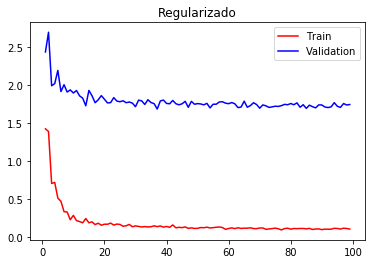

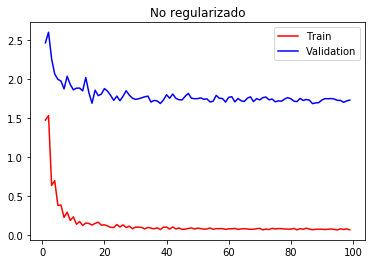

In [14]:
n_estim = np.arange(start=1, stop=100, step=1)
arr_train = []
arr_val = []
arr_train2 = []
arr_val2 = []
for i in n_estim:
    model_r = AdaBoostRegressor(base_estimator=Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators=i)
    model_r.fit(X_train,y_train)
    y_train_hat = model_r.predict(X_train)
    y_val_hat = model_r.predict(X_val)
    RMSE_train=RMSE(y_train,y_train_hat)
    RMSE_val=RMSE(y_val,y_val_hat)
    arr_train.append(RMSE_train)
    arr_val.append(RMSE_val)
    model_unr = AdaBoostRegressor(base_estimator=Tree(), n_estimators=i)
    model_unr.fit(X_train,y_train)
    y_train2_hat = model_unr.predict(X_train)
    y_val2_hat = model_unr.predict(X_val)
    RMSE_train2=RMSE(y_train,y_train2_hat)
    RMSE_val2=RMSE(y_val,y_val2_hat)
    arr_train2.append(RMSE_train2)
    arr_val2.append(RMSE_val2)

plt.plot(n_estim,arr_train, c='r', label='Train')
plt.plot(n_estim,arr_val, c= 'b', label='Validation')
plt.legend()
plt.title("Regularizado")
plt.show()
    
plt.plot(n_estim,arr_train2, c='r', label='Train')
plt.plot(n_estim,arr_val2, c= 'b', label='Validation')
plt.legend()
plt.title("No regularizado")
plt.show()
    

Se puede observar un overfitting similar para ambos tipos de arboles, siendo un poco mayor para el caso de arbol no regularizado. Comparado a la tecnica de Bagging, esta entrega mejores resultados. La tendencia es la misma a la anterior, es decir, a medida que se aumentan los numeros de estimadores el error tiende a bajar. El error para el conjunto de entrenamiento es demasiado bajo dado el overfitting, provocando que para el conjunto de validación el error aumente hasta valores altos.

> f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del RMSE de entrenamiento y validación en función de este hiper-parámetro.


In [15]:
from sklearn.ensemble import RandomForestRegressor

##No Regularizado
model_unr = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=None,oob_score = True)
model_unr.fit(X_train,y_train)
y_train2_hat = model_unr.predict(X_train)
y_val2_hat = model_unr.predict(X_val)
print("RMSE train No Regularizado Tree= ",RMSE(y_train,y_train2_hat))
print("RMSE val No Regularizado Tree= ",RMSE(y_val,y_val2_hat))
##Regularizado
model_r = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=13,oob_score = True)
model_r.fit(X_train,y_train)
y_train_hat = model_r.predict(X_train)
y_val_hat = model_r.predict(X_val)
print("RMSE train Regularized Tree= ",RMSE(y_train,y_train_hat))
print("RMSE val Regularized Tree= ",RMSE(y_val,y_val_hat))


RMSE train No Regularizado Tree=  0.6603293675624392
RMSE val No Regularizado Tree=  1.7005320203906242
RMSE train Regularized Tree=  0.6780061492942253
RMSE val Regularized Tree=  1.6901702887981043


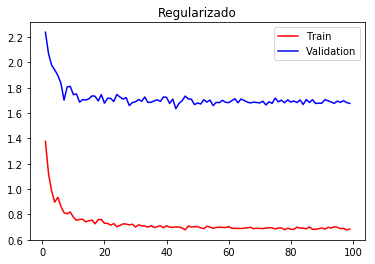

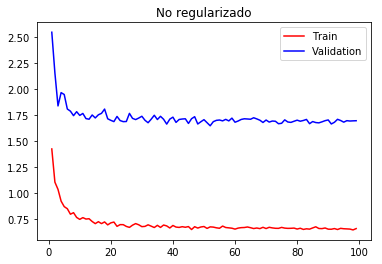

In [16]:
n_estim = np.arange(start=1, stop=100, step=1)
arr_train = []
arr_val = []
arr_train2 = []
arr_val2 = []
for i in n_estim:
    model_r2 = RandomForestRegressor(n_estimators=i,n_jobs=-1,max_depth=13)
    model_r2.fit(X_train,y_train)
    y_train_hat = model_r2.predict(X_train)
    y_val_hat = model_r2.predict(X_val)
    RMSE_train=RMSE(y_train,y_train_hat)
    RMSE_val=RMSE(y_val,y_val_hat)
    arr_train.append(RMSE_train)
    arr_val.append(RMSE_val)
    model_unr = RandomForestRegressor(n_estimators=i,n_jobs=-1,max_depth=None)
    model_unr.fit(X_train,y_train)
    y_train2_hat = model_unr.predict(X_train)
    y_val2_hat = model_unr.predict(X_val)
    RMSE_train2=RMSE(y_train,y_train2_hat)
    RMSE_val2=RMSE(y_val,y_val2_hat)
    arr_train2.append(RMSE_train2)
    arr_val2.append(RMSE_val2)


plt.plot(n_estim,arr_train, c='r', label='Train')
plt.plot(n_estim,arr_val, c= 'b', label='Validation')
plt.legend()
plt.title("Regularizado")
plt.show()
    
plt.plot(n_estim,arr_train2, c='r', label='Train')
plt.plot(n_estim,arr_val2, c= 'b', label='Validation')
plt.legend()
plt.title("No regularizado")
plt.show()
    

Al igual que las otras técnicas se tiene que los resultados para un arbol no regularizado son mejores que para uno regularizado. Además, el overfitting es menor para este tipo de técnica, favoreciendo un buen resultado para el conjunto de validación o de test.


> g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compare con el error calculado sobre el conjunto de validación (o en su defecto *cross validation*).


In [17]:
oob_error = model_r.oob_score_
val_error = model_r.score(X_val,y_val)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)

OOB error:  0.9441962996035099
Val error:  0.9430950586941238


El comportamiento de ambos errores son similares, de lo cual podemos concluir que el OOB error es un buen estimador para el error de predicción de un modelo.

> h) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento). Se puede inspirar desde clásicos estadísticos, como entregar el primer cuartíl ($Q_1$) si al ensamblado le cuesta predecir valores bajos, o el segundo cuartil ($Q_2$) o mediana para ser robusto a predicciones atípicas de modelos.  



In [18]:
Bagging =  BaggingRegressor(base_estimator=Tree(max_depth=13,min_samples_split=2,min_samples_leaf=1), n_estimators=100, n_jobs=-1)
Bagging.fit(X_train,y_train)

def combine_predictions(predictions):
    model_r2 = RandomForestRegressor(n_estimators=100,n_jobs=-1,max_depth=13)
    model_r2.fit(X_train,y_train)
    y_train_hat = model_r2.predict(X_train)
    y_val_hat = model_r2.predict(X_val)
    return (predictions+y_val_hat)/2

list_estimators = Bagging.estimators_
list_predictions = [estimator.predict(X_val) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
print("RMSE val= ",RMSE(y_val, new_predictions))

RMSE val=  1.9044904738052404


Para combinar las predicciones se entrena un arbol regularizado utilizando la técnica de Bagging y luego se promedia con la predicción para un modelo utilizando la técnica de RandomForest. Al combinar estas dos predicciones se obtiene un error de 1.88 aproximadamente. Al ser comparado con los dos valores de RMSE para cada modelo por separado, este resultado es mayor, por lo que concluimos que la combinación de predicciones basada en promedio no fue una buena forma de realizar la predicción.


> i) Si se cuenta con una gran cantidad de modelos en el ensamblado, por ejemplo $T>100$, se puede crear un intervalo de confianza de la predicción a través de todos estos valores, asumiendo una distribución Normal centrada en la media muestral de las predicciones, con desviación estándar muestral en las predicciones. El intervalo de confianza entrega más información que un único valor puntual de predicción. Visualice un intervalo de confianza al 95% de probabilidad en la predicción a lo largo de la serie de tiempo de validación, comente. Al asumir una distribución Normal, también puede explorar el tomar como predicción del ensamblado el muestreo sobre la distribución Normal creada entorno a los datos muestrales.


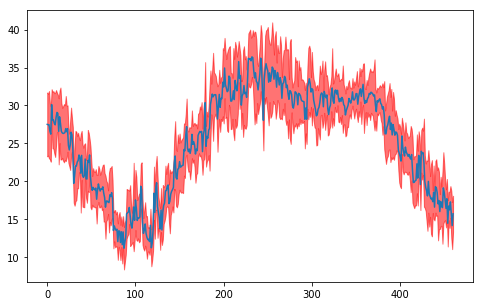

In [30]:
X_val_est = np.vstack(list_predictions).T #has shape=(N_test, n_estimator), with n_estimator>100
from scipy.stats import norm
interv_val = []
for n in range(X_val.shape[0]):
    low, up = norm.interval(0.95, loc=np.mean(X_val_est[n]), scale=np.std(X_val_est[n]))
    interv_val.append([low,up])
interv_val = np.asarray(interv_val)
x = np.arange(X_val_est.shape[0])
plt.figure(figsize=(8,5))
plt.plot(x, np.mean(X_val_est, axis=1))
plt.fill_between(x, interv_val[:,0], interv_val[:,1], color='r', alpha=.55)
plt.show()

Al utilizar un intervalo de confianza de 95% podemos ver que todas las predicciones siguen una tendencia donde primero se disminuye, luego aumenta y luego disminuye, lo que es correspondiente con la temperatura segun las distintas estaciones del año. 

    
>  j) Evalúe y visualice la predicción del mejor modelo encontrado para resolver este problema, en el conjunto de pruebas. Además, compare y analice las distintas maneras con las que se resolvió el problema, incluya las decisiones que conlleva y los resultados que reflejan.
```python
df = pd.read_csv("DailyDelhiClimateTest.csv")
```

In [20]:
import pandas as pd
df = pd.read_csv("DailyDelhiClimateTest.csv")
df["y_value"] = df["meantemp"].shift(-1)
df = df.iloc[:-1] #remove last row
df["date"] = pd.to_datetime(df["date"])
df['cday'] = df['date'].dt.dayofweek #0:lunes,6:domingo
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month #1:enero, 12: diciembre
...#based on: https://en.wikipedia.org/wiki/Climate_of_India
seasons = ["winter","winter","summer","summer","summer","rainy","rainy","rainy","fall","fall","fall","winter"]
df['season'] = [ seasons[month_i - 1] for month_i in df['month'].values ]
df = pd.get_dummies(df,columns=['season']) #to one hot.. as nominal variable
... #any more information?
df.drop(["date"], axis=1, inplace=True) #delete date
df['season_rainy']=0
df['season_fall']=0  ### Se agregan dos columnas vacias para que queden del mismo tamaño el dataframe
y_test = df.pop("y_value").values
X_test = df.values 


print(X_test.shape)
print(X_train.shape)
df.head()

(113, 11)
(1000, 11)


,meantemp,humidity,wind_speed,meanpressure,cday,year,month,season_summer,season_winter,season_rainy,season_fall
0,15.913043,85.869565,2.743478,59.000000,6,2017,1,0,1,0,0
1,18.500000,77.222222,2.894444,1018.277778,0,2017,1,0,1,0,0
2,17.111111,81.888889,4.016667,1018.333333,1,2017,1,0,1,0,0
3,18.700000,70.050000,4.545000,1015.700000,2,2017,1,0,1,0,0
4,18.388889,74.944444,3.300000,1014.333333,3,2017,1,0,1,0,0


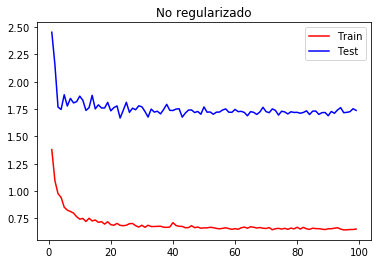

In [21]:
n_estim = np.arange(start=1, stop=100, step=1)
arr_train = []
arr_test = []
for i in n_estim:
    model_ur2 = RandomForestRegressor(n_estimators=i,n_jobs=-1)
    model_ur2.fit(X_train,y_train)
    y_train_hat = model_ur2.predict(X_train)
    y_test_hat = model_ur2.predict(X_test)
    RMSE_train=RMSE(y_train,y_train_hat)
    RMSE_val=RMSE(y_test,y_test_hat)
    arr_train.append(RMSE_train)
    arr_test.append(RMSE_val)
    
plt.plot(n_estim,arr_train, c='r', label='Train')
plt.plot(n_estim,arr_test, c= 'b', label='Test')
plt.legend()
plt.title("No regularizado")
plt.show()

Se trabajo con el modelo Random Forest no regularizado dado que fue el que entrego mejores resultados en terminos de overfitting y de un error bajo para el conjunto de validación. Al realizar la predicción para el conjunto de test luego de un entrenamiento podemos darnos cuenta que el error se estabiliza a traves del tiempo pero con mayores variaciones respecto a los gráficos que fueron realizados anteriormente. A partir de esto, podemos concluir que la predicción de este modelo es correcta ya que tanto para un conjunto de test como uno de validación el error es bajo (menor a 2), el cual encontramos que es un valor aceptable para un tamaño de datos no tan grande.

<a id="segundo"></a>
## 2. Detección de acoso en *Twitter*
---
En las redes sociales muchas veces se encuentra con un cierto comportamiento indeseable para los usuarios, tal como racismo, misógeno, grupos de odio o *trolls*. El poder detectar de manera automática ciertos patrones en el comportamiento para tomar una acción debe ser crucial para reducir el tiempo y esfuerzo humano. En esta actividad se trabajará sobre *tweets* la red social de *twitter* para detectar comportamiento *online* de acoso (*harassment*), que por lo general, incluye *flaming* como lenguaje abusivo o insultos, *doxing* como mostrar la información personal de una mujer, por ejemplo el domicilio o número de teléfono, la suplantación o la vergüenza pública por destruir la reputación de las personas.

<img src="https://kidshelpline.com.au/sites/default/files/bdl_image/header-T-OH.png" title="Title text" width="45%"  />

En algunos problemas como este, el comportamiento a detectar puede ser asociado a una anomalía (*outlier*) del comportamiento normal de los usuarios en las redes sociales. Esto es una de las causas de la dificultad del problema, puesto que es **altamente desbalanceado**, donde aproximadamente un 10% de los *tweets* corresponden a acoso (*harassment*).

Los datos trabajados corresponderan a *tweets* etiquetados como *harassment* (con valor 1) o no (con valor 0) -- la tarea a detectar--. Además si desea utilizar, se incluye la información del tipo de *harassment* en el conjunto de entrenamiento como atributos extras. El conjunto de pruebas solo contiene los *tweets* a ser etiquetados.

---
### Importante
* Esta pregunta será evaluada **sólo** por los resultados (*submission*) obtenidos en el desafío presentado en __[Kaggle](https://www.kaggle.com/c/t1-ml/)__ a través del siguiente __[link](https://www.kaggle.com/t/91f8c0c746f945cfa510b88469df4d67)__. Las notas serán entregadas a través de la siguiente fórmula:  
$$ Nota(i) = 100\cdot max\left(0.55; s^{(1-i)} \right), \ \ con \ \ i \in \{1,\ \ldots, N\}$$
Con la escala de decaimiento es $ s = 1.05$ y con $i$ su lugar en el *ranking*.

* La métrica de evaluación será el *f1 score* [[3]](#refs) sobre la clase positiva (*harassment*), así evaluar la calidad del modelo sobre la clase minoritaria, lo cual también debiera reflejar el desempeño de la clase negativa (al ser el complemento).
```python
from  sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')
```

* El archivo de *submission* debe contener las predicciones de *harassment* (0 o 1) a cada dato de pruebas, además de la columna de *id* asociado al dato, iniciando en 1. Si leyó de manera ordenada el archivo de pruebas, se puede generar de la siguiente manera:
```python
df_aux = pd.DataFrame()
df_aux["id"] = np.arange(1, 1+y_pred.shape[0])
df_aux["harassment"] = y_pred.astype('int')
df_aux.to_csv("test_estimation.csv", index=False)
```

* Se solicita realizar **un solo** *submission* por grupo, para no perjudicar la nota de sus compañeros en el *ranking*. Además de ser claros con sus nombres de entrega para no asignarles de manera errónea su correspondiente nota.

* **Si no realiza *submission* a Kaggle su nota en esta sección será de 0**.

* **Si su *score* alcanzado es menor o igual al *benchmark* random que se encuentra en el *ranking*, su nota en esta sección será de 25**

<a id="refs"></a>
## Referencias
[1] https://scikit-learn.org/stable/modules/ensemble.html  
[2] https://scikit-learn.org/stable/modules/tree.html  
[3] http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html  
[4] https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18